In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [30]:
df_CDB = pd.read_csv(r'../../results/calibration-irregular-intervals-results-conventionalV004.csv', delimiter=',', skiprows=0, low_memory=False)

In [31]:
df_HEB = pd.read_csv(r'../../results/calibration-irregular-intervals-results-hybridV003.csv', delimiter=',', skiprows=0, low_memory=False)

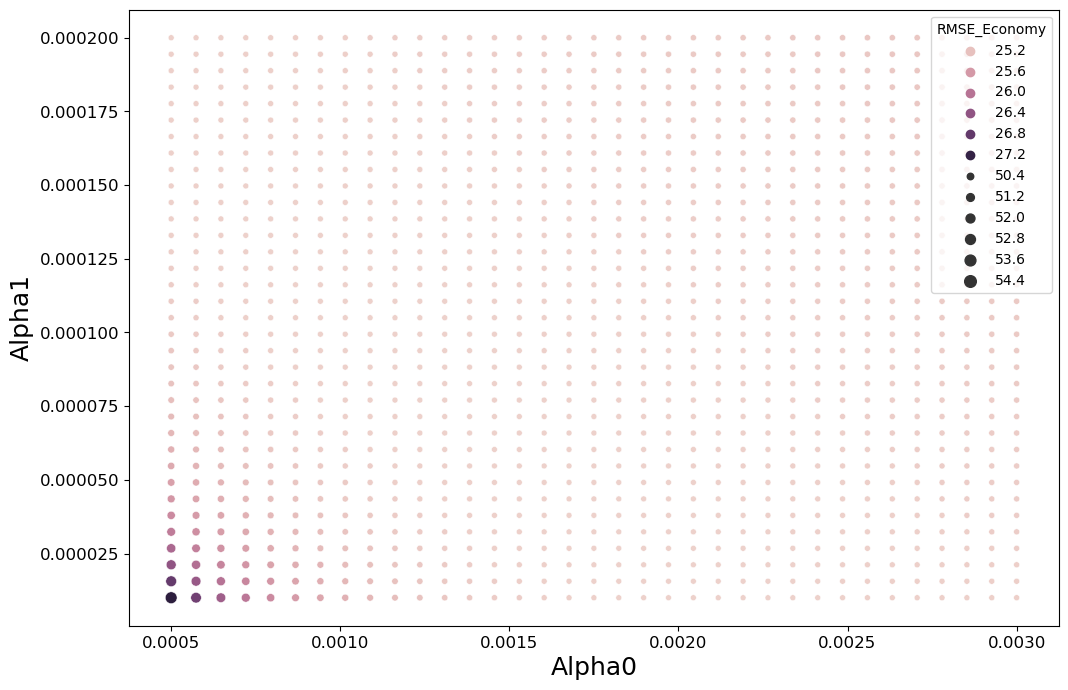

In [32]:
fig = plt.figure(figsize=(12, 8))
size=df_CDB['RMSE_Economy']*2
sns.scatterplot(data=df_CDB, x='parameter1_values', y='parameter2_values', size=size, hue='RMSE_Economy')
plt.xlabel("Alpha0", fontsize=18)
plt.ylabel("Alpha1", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

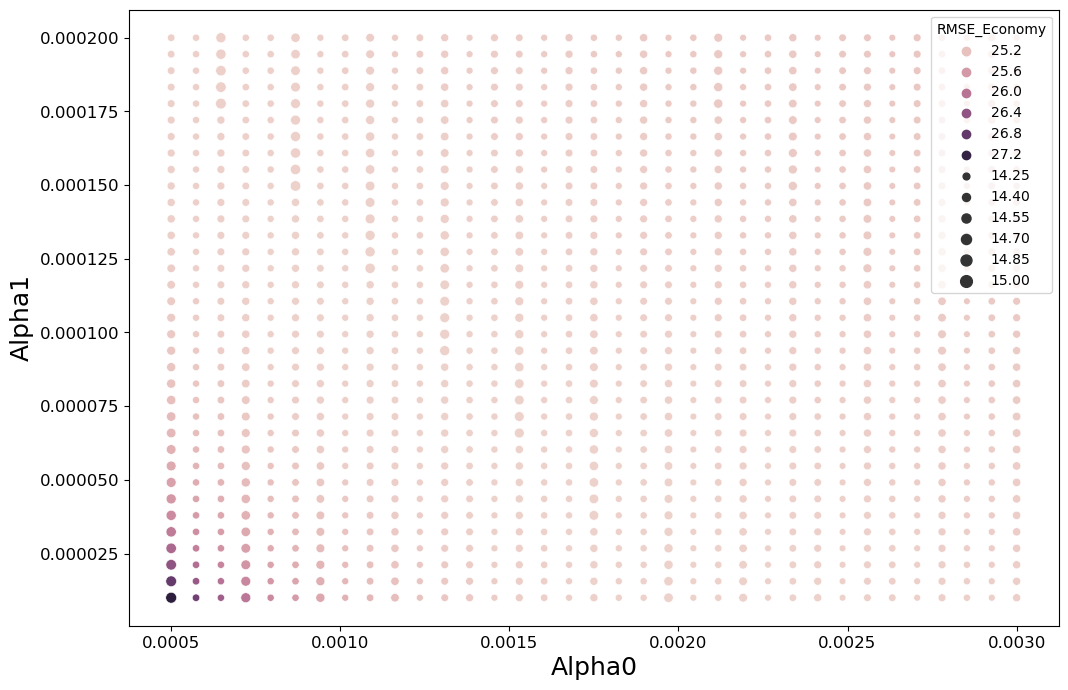

In [33]:
fig = plt.figure(figsize=(12, 8))
size=df_HEB['RMSE_Economy']*2
sns.scatterplot(data=df_CDB, x='parameter1_values', y='parameter2_values', size=size, hue='RMSE_Economy')
plt.xlabel("Alpha0", fontsize=18)
plt.ylabel("Alpha1", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

(array([0.00e+00, 2.50e-05, 5.00e-05, 7.50e-05, 1.00e-04, 1.25e-04,
        1.50e-04, 1.75e-04, 2.00e-04, 2.25e-04]),
 [Text(0.0, 0, '0.000000'),
  Text(2.5e-05, 0, '0.000025'),
  Text(5e-05, 0, '0.000050'),
  Text(7.500000000000001e-05, 0, '0.000075'),
  Text(0.0001, 0, '0.000100'),
  Text(0.000125, 0, '0.000125'),
  Text(0.00015000000000000001, 0, '0.000150'),
  Text(0.000175, 0, '0.000175'),
  Text(0.0002, 0, '0.000200'),
  Text(0.00022500000000000002, 0, '0.000225')])

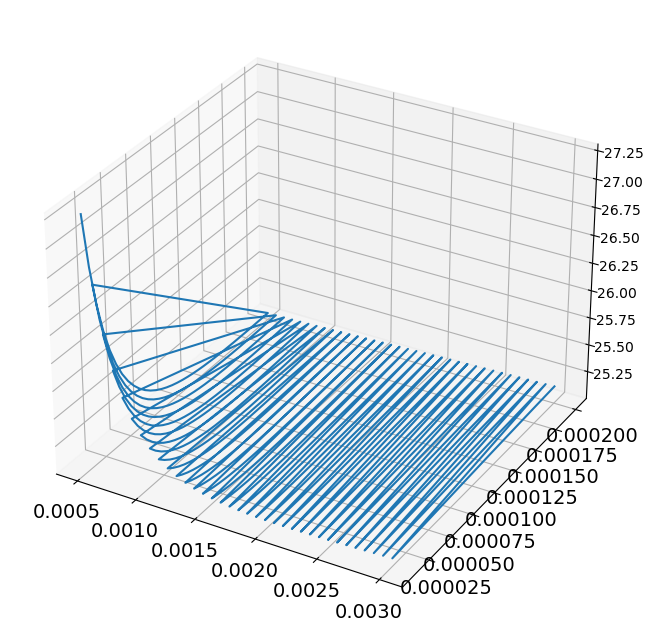

In [34]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
xline=df_CDB['parameter1_values']
yline=df_CDB['parameter2_values']
zline=df_CDB['RMSE_Economy']
ax.plot3D(xline, yline, zline)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

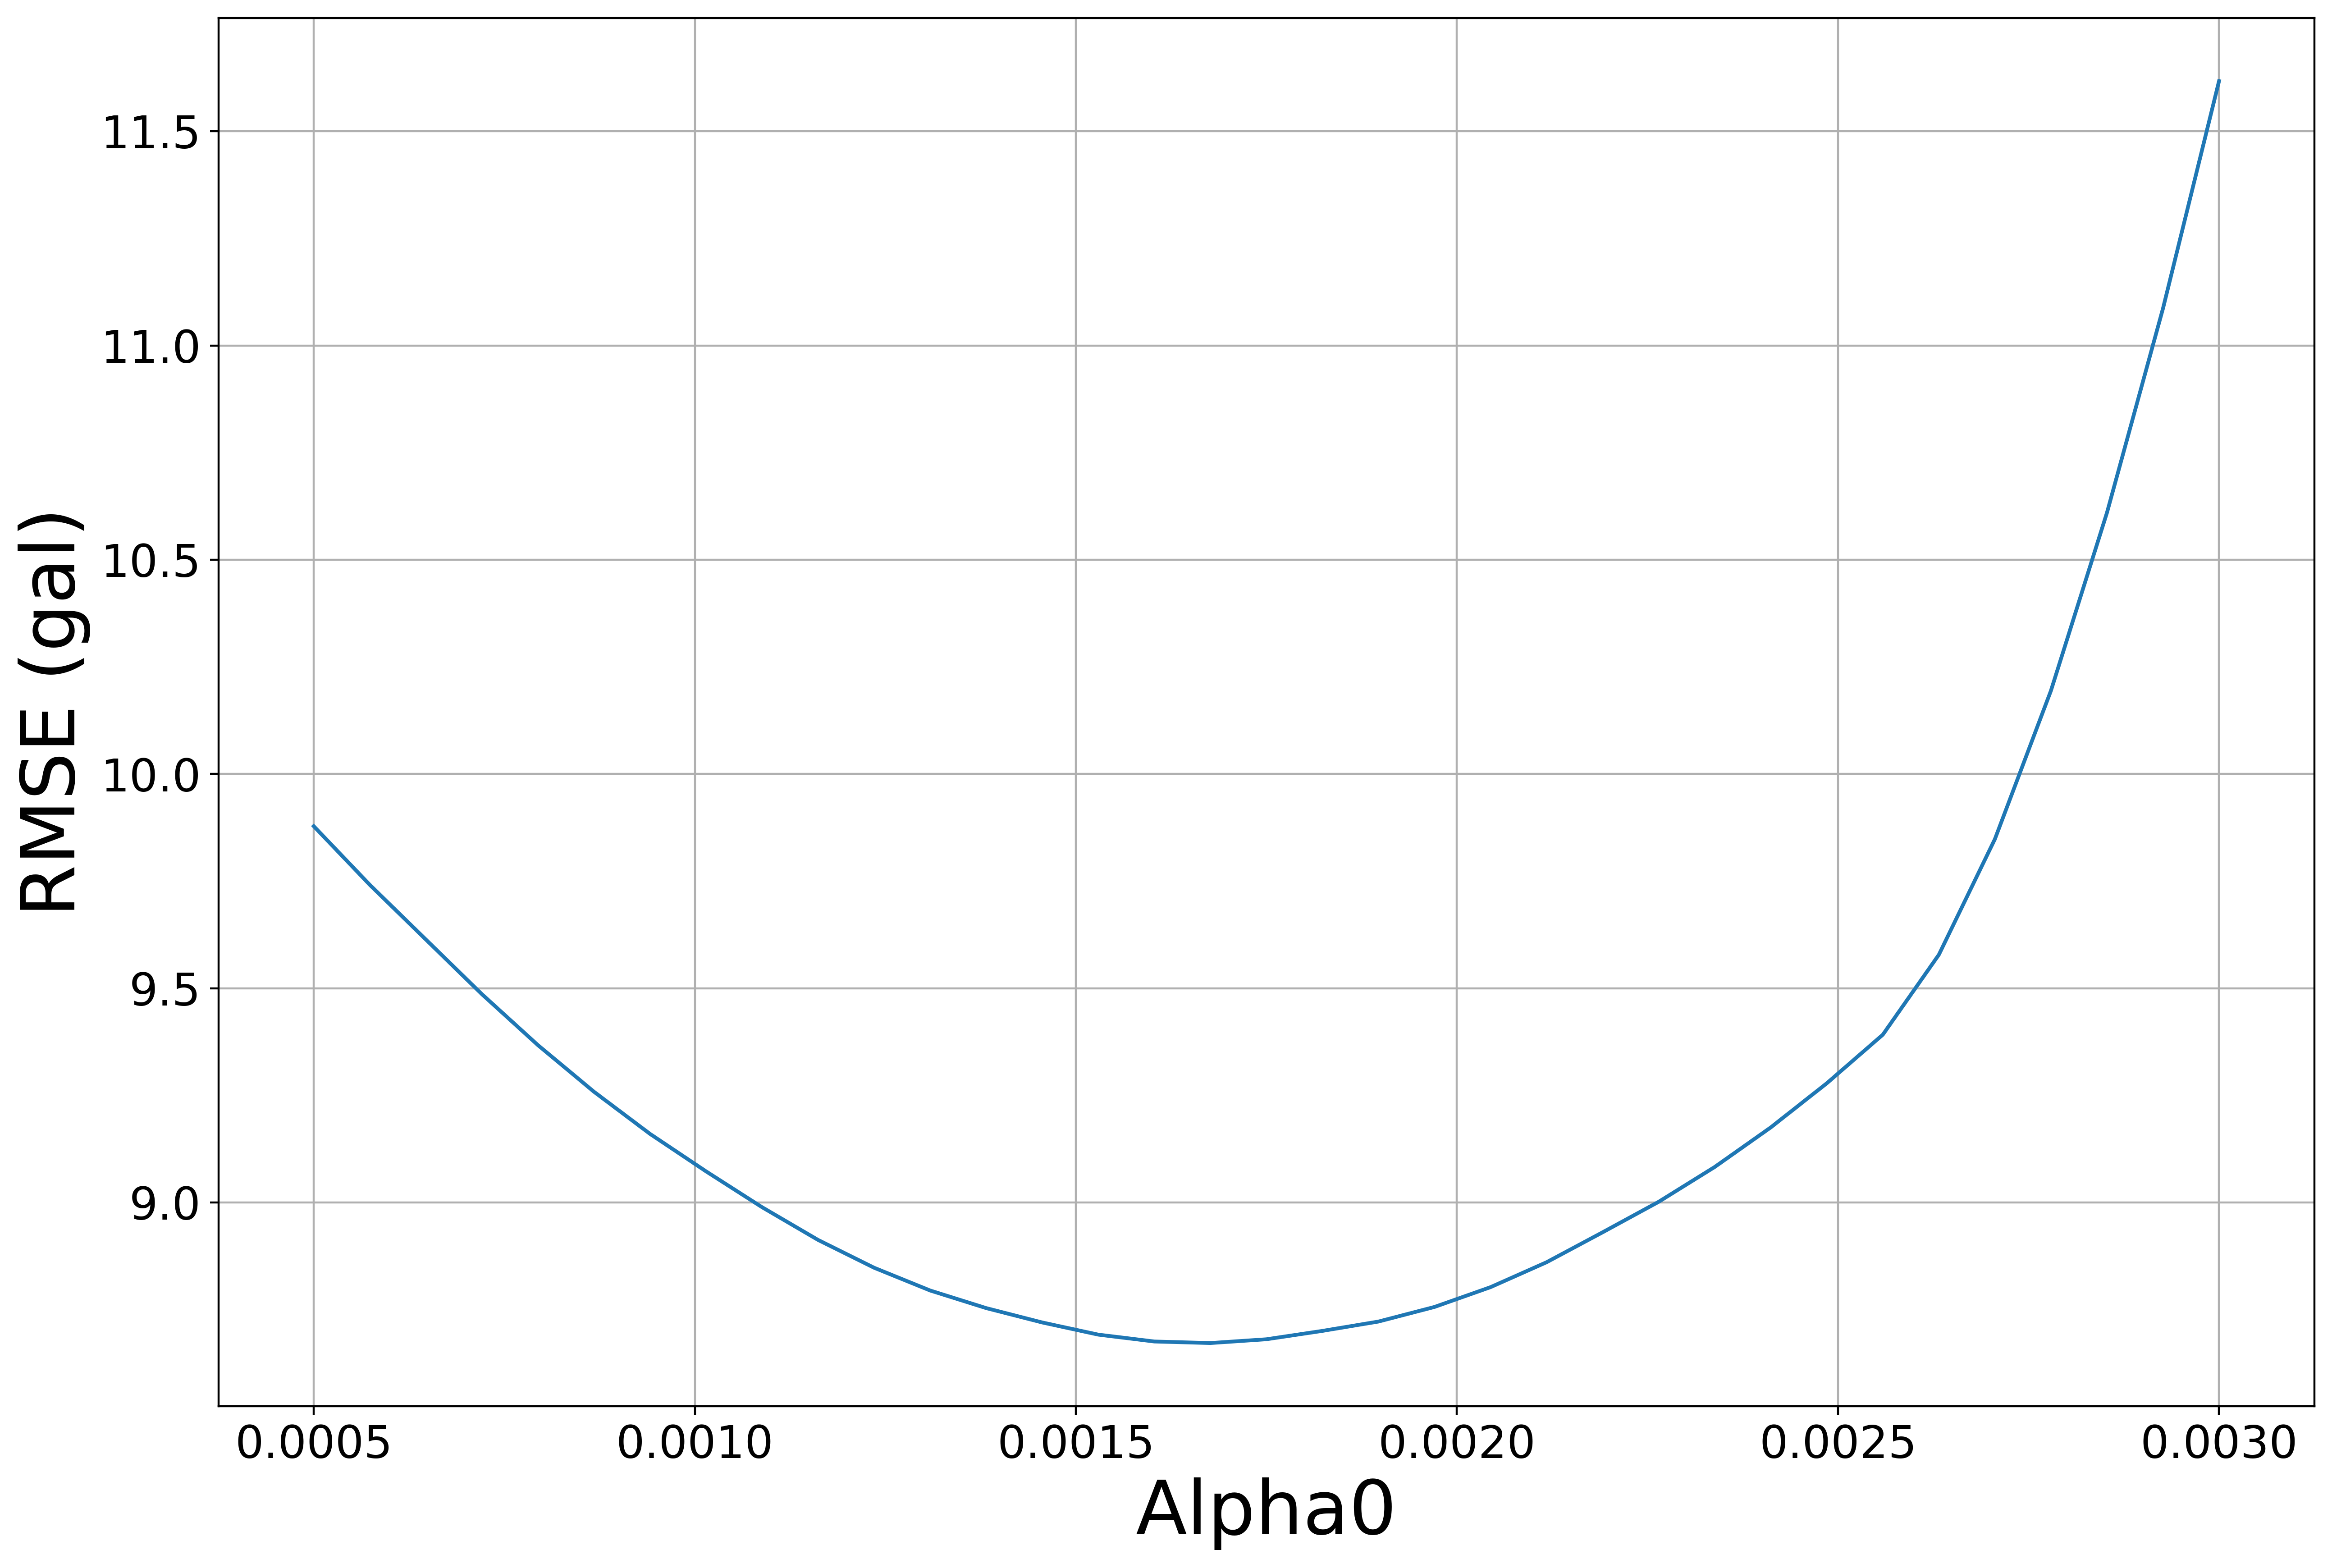

In [35]:
figure(figsize=(15, 10), dpi=400)
#plt.scatter(x=df_HEB['parameter1_values'], y=df_HEB['RMSE_Economy'])
plot1=df_CDB.groupby(by="parameter1_values")['RMSE_Energy'].min().reset_index()
plt.plot(plot1['parameter1_values'], plot1['RMSE_Energy'])
plt.xlabel("Alpha0", fontsize=30)
plt.ylabel("RMSE (gal)", fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/calibration-CDB-energy-alpha0.png', dpi=400, bbox_inches='tight')
plt.show()


In [36]:
#figure(figsize=(12, 8), dpi=400)
#plt.scatter(x=df_HEB['parameter1_values'], y=df_HEB['RMSE_Economy'])
#plot1=df_CDB.groupby(by="parameter1_values")['RMSE_Economy'].min().reset_index()
#plt.plot(plot1['parameter1_values'], plot1['RMSE_Economy'])
#plt.xlabel("Alpha0", fontsize=18)
#plt.ylabel("RMSE of economy (mpg)", fontsize=18)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.grid()
#plt.savefig(r'../../figures/calibration-CDB-economy-alpha0.png', dpi=400, bbox_inches='tight')
#plt.show()


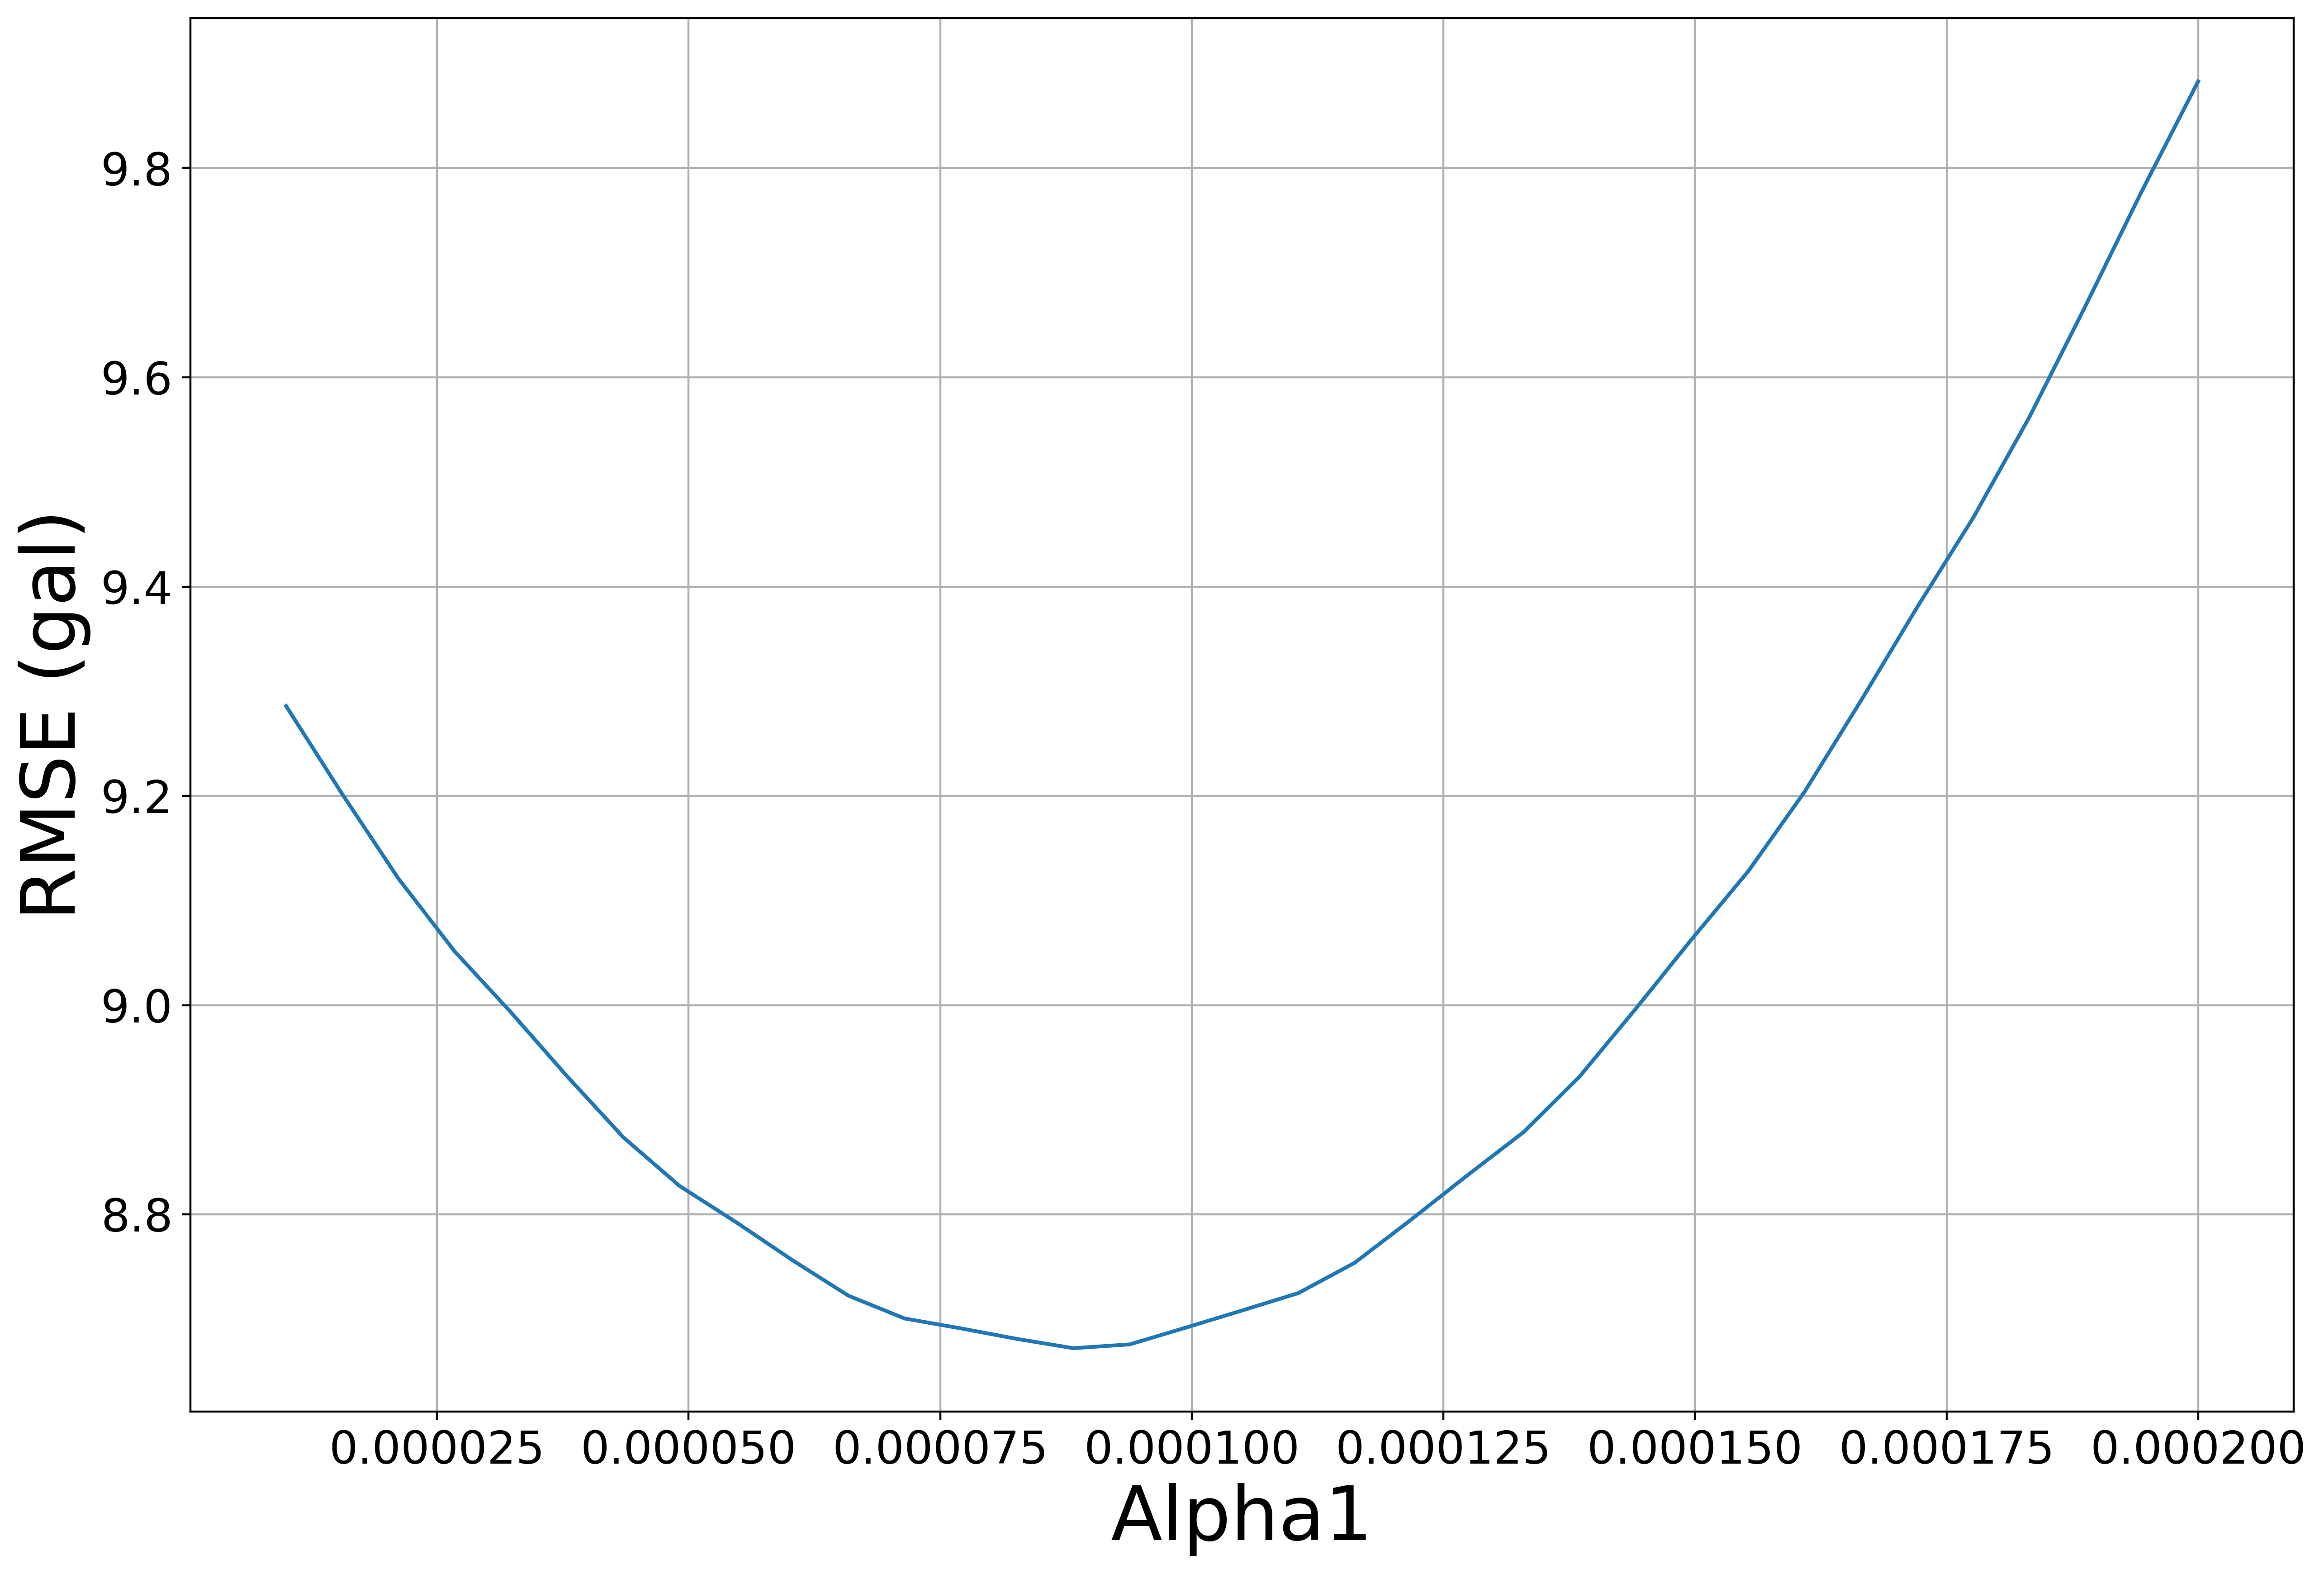

In [37]:
figure(figsize=(15, 10), dpi=400)
plot1=df_CDB.groupby(by="parameter2_values")['RMSE_Energy'].min().reset_index()
plt.plot(plot1['parameter2_values'], plot1['RMSE_Energy'])
plt.xlabel("Alpha1", fontsize=30)
plt.ylabel("RMSE (gal)", fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/calibration-CDB-energy-alpha1.png', dpi=400, bbox_inches='tight')
plt.show()

In [38]:
#figure(figsize=(12, 8), dpi=400)
#plot1=df_CDB.groupby(by="parameter2_values")['RMSE_Economy'].min().reset_index()
#plt.plot(plot1['parameter2_values'], plot1['RMSE_Economy'])
#plt.xlabel("Alpha1", fontsize=18)
#plt.ylabel("RMSE of economy (mpg)", fontsize=18)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.grid()
#plt.savefig(r'../../figures/calibration-CDB-economy-alpha1.png', dpi=400, bbox_inches='tight')
#plt.show()

In [39]:
#figure(figsize=(12, 8), dpi=400)
#plt.scatter(x=df_HEB['parameter1_values'], y=df_HEB['RMSE_Economy'])
#plot1=df_HEB.groupby(by="parameter1_values")['RMSE_Economy'].min().reset_index()
#plt.plot(plot1['parameter1_values'], plot1['RMSE_Economy'])
#plt.plot(df_CDB['parameter1_values'], df_CDB['RMSE_Energy'], color='red', label='RMSE of energy (gallons)')
#plt.xlabel("Alpha0", fontsize=18)
#plt.ylabel("RMSE of fuel economy (mpg)", fontsize=18)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.grid()
#plt.savefig(r'../../figures/calibration-HEB-economy-alpha0.png', dpi=400, bbox_inches='tight')
#plt.show()

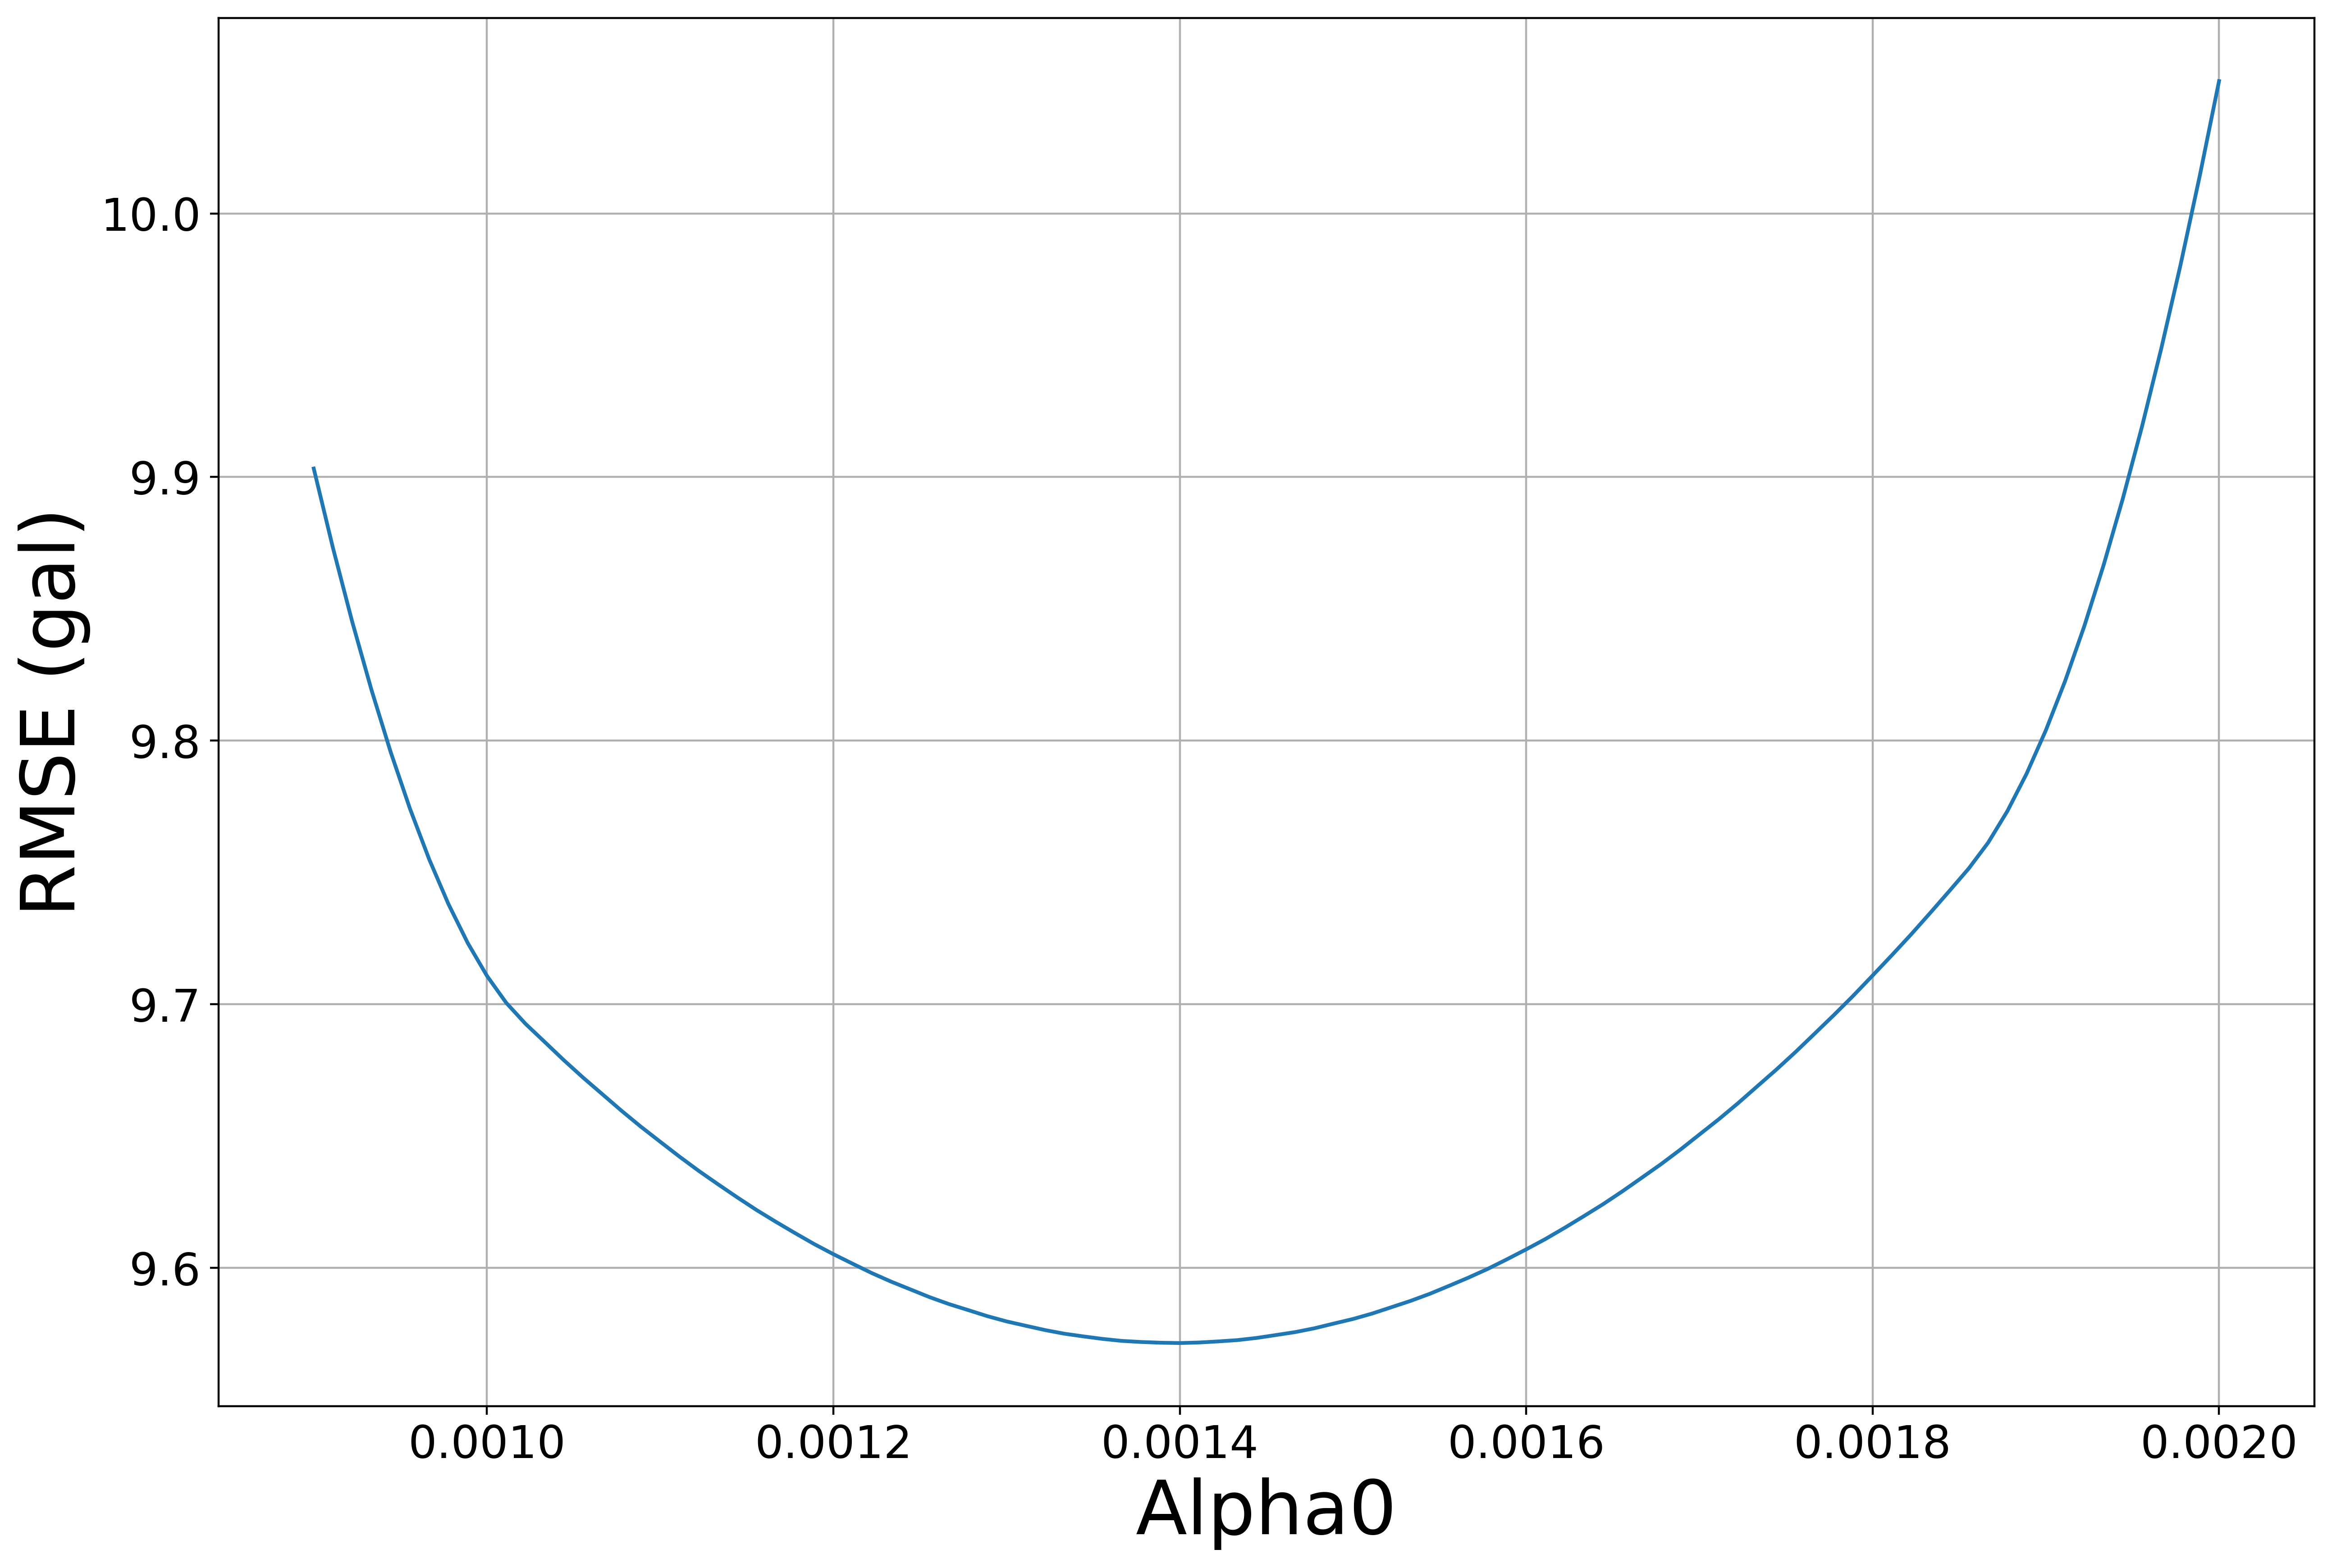

In [40]:
figure(figsize=(15, 10), dpi=400)
plot1=df_HEB.groupby(by="parameter1_values")['RMSE_Energy'].min().reset_index()
plt.plot(plot1['parameter1_values'], plot1['RMSE_Energy'])
plt.xlabel("Alpha0", fontsize=30)
plt.ylabel("RMSE (gal)", fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/calibration-HEB-energy-alpha0.png', dpi=400, bbox_inches='tight')
plt.show()

In [41]:
#figure(figsize=(12, 8), dpi=400)
#plot1=df_HEB.groupby(by="parameter2_values")['RMSE_Economy'].min().reset_index()
#plt.plot(plot1['parameter2_values'], plot1['RMSE_Economy'])
#plt.xlabel("Alpha1", fontsize=18)
#plt.ylabel("RMSE of fuel economy (mpg)", fontsize=18)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.grid()
#plt.savefig(r'../../figures/calibration-HEB-economy-alpha1.png', dpi=400, bbox_inches='tight')
#plt.show()

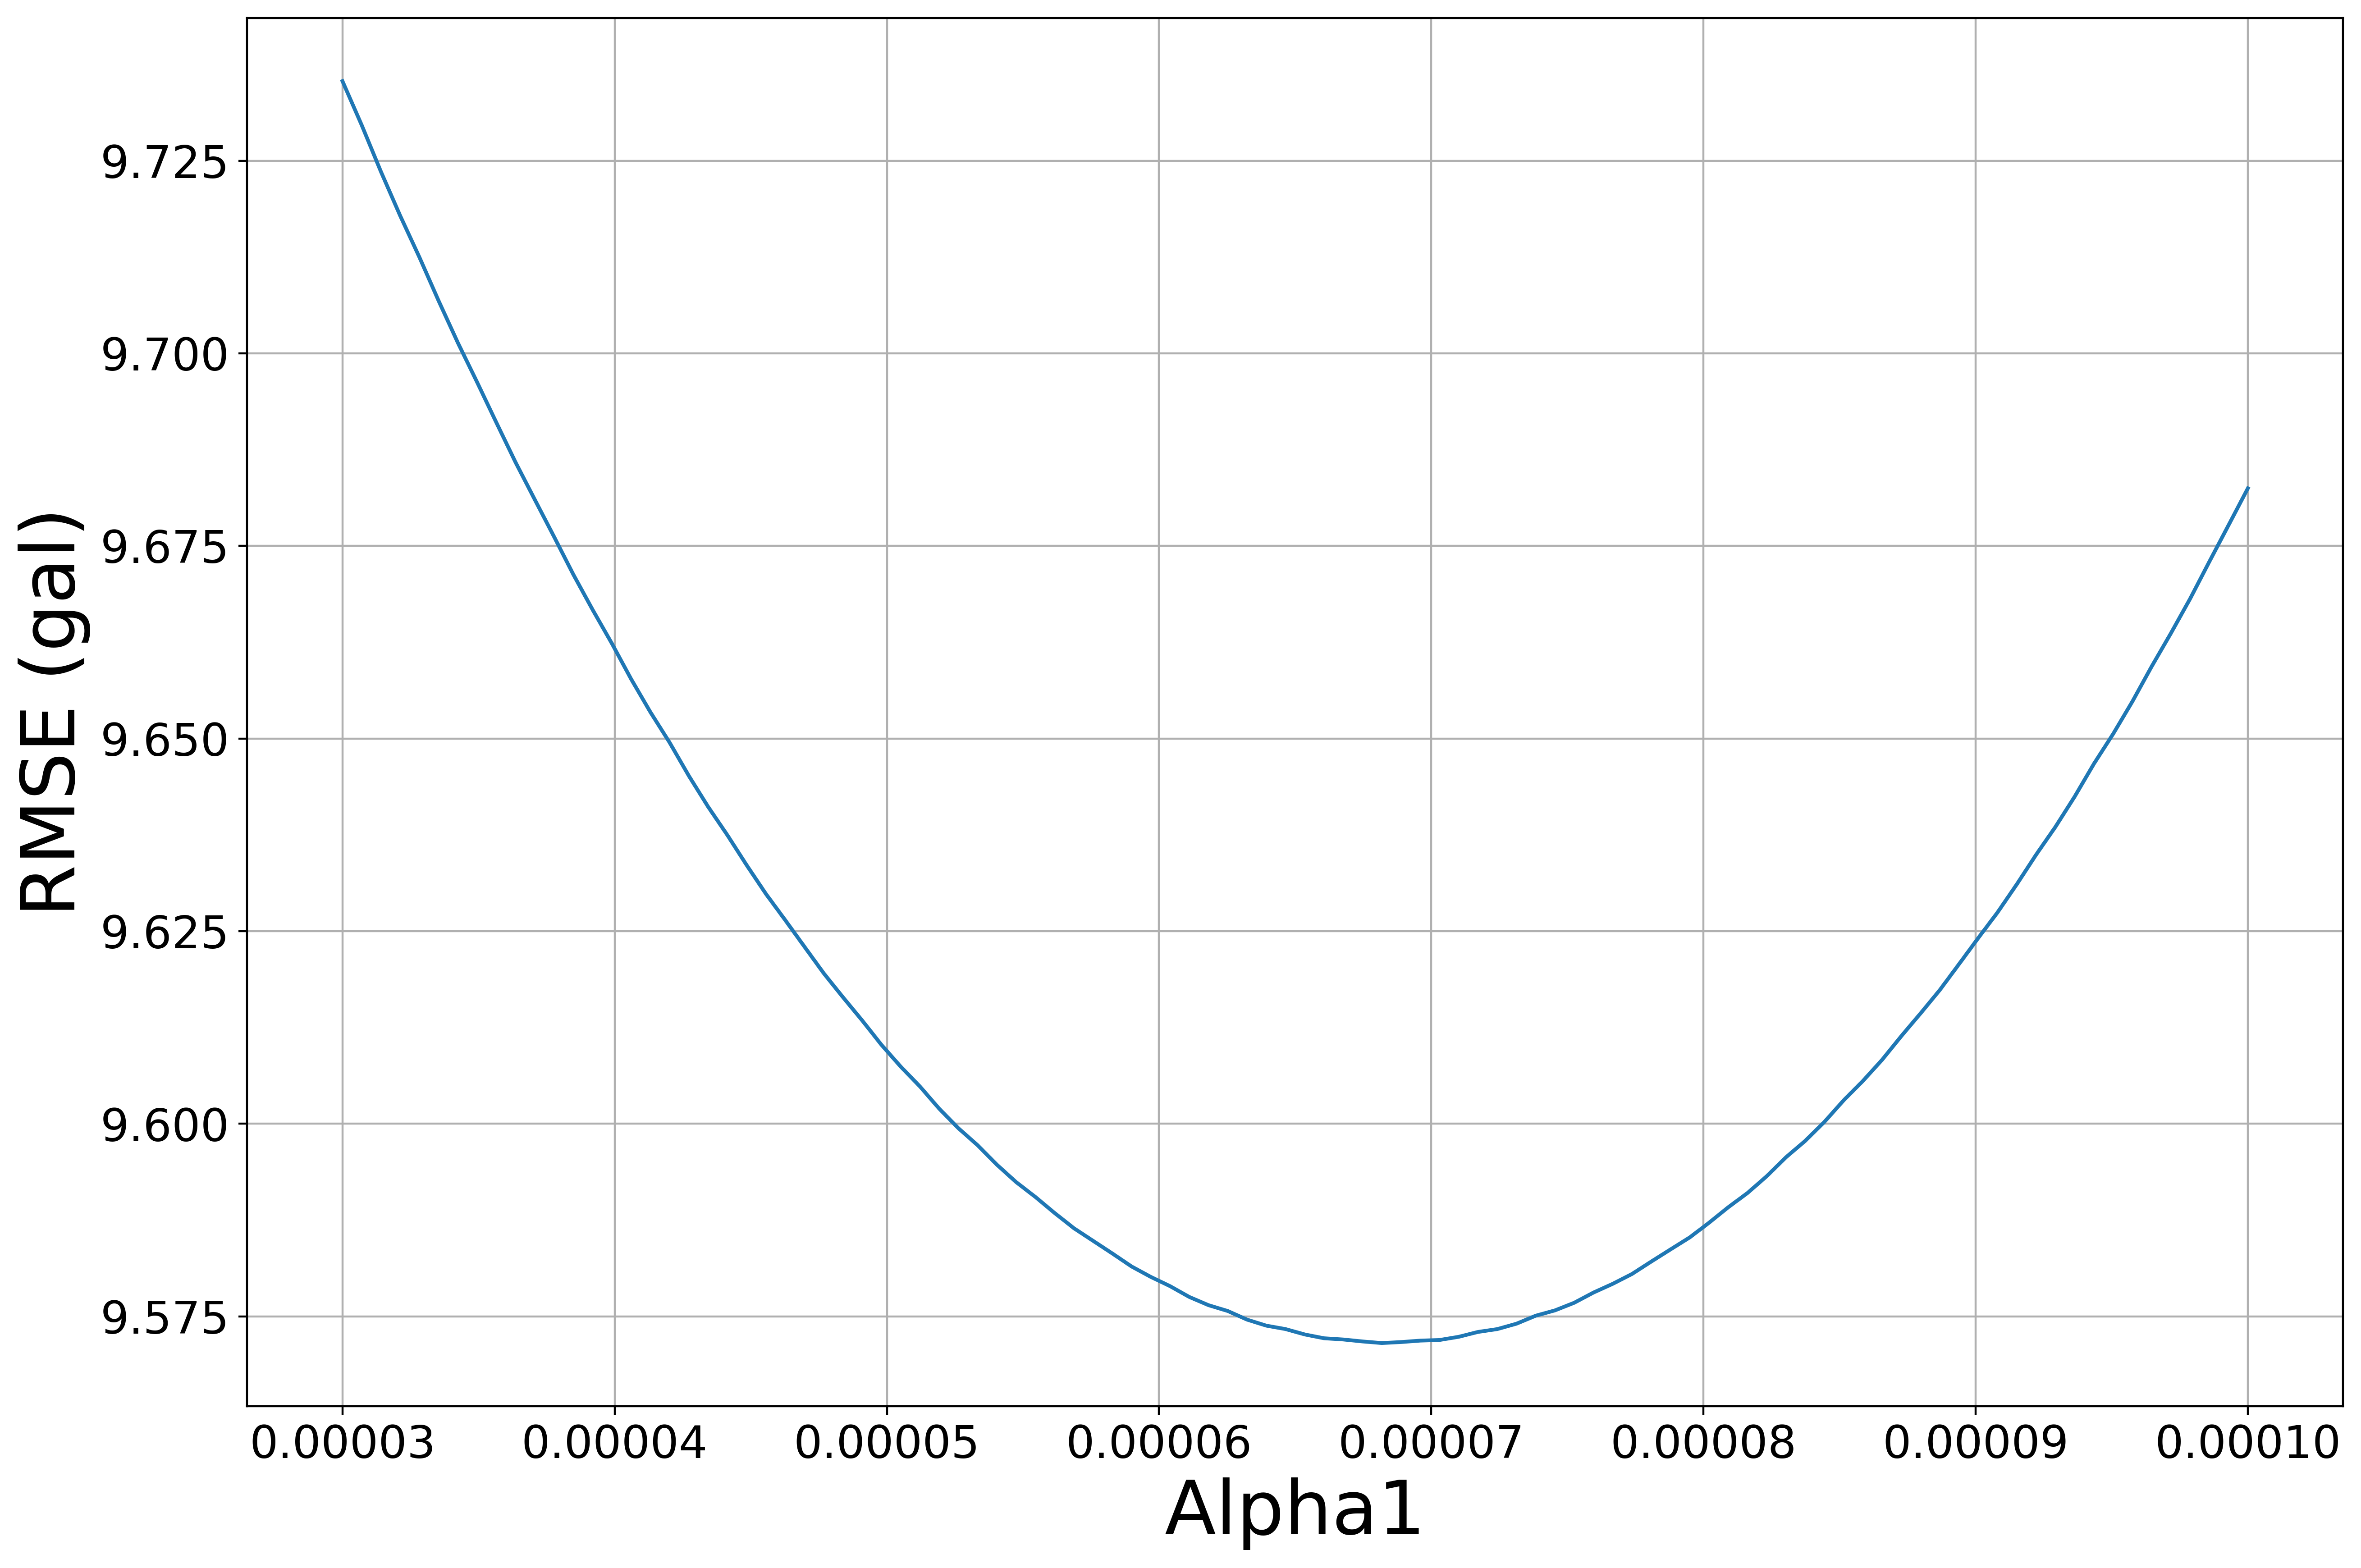

In [42]:
figure(figsize=(15, 10), dpi=400)
plot1=df_HEB.groupby(by="parameter2_values")['RMSE_Energy'].min().reset_index()
plt.plot(plot1['parameter2_values'], plot1['RMSE_Energy'])
plt.xlabel("Alpha1", fontsize=30)
plt.ylabel("RMSE (gal)", fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/calibration-HEB-energy-alpha1.png', dpi=400, bbox_inches='tight')
plt.show()

In [43]:
df_beta = pd.read_csv(r'../../results/calibration-results-beta.csv', delimiter=',', skiprows=0, low_memory=False)

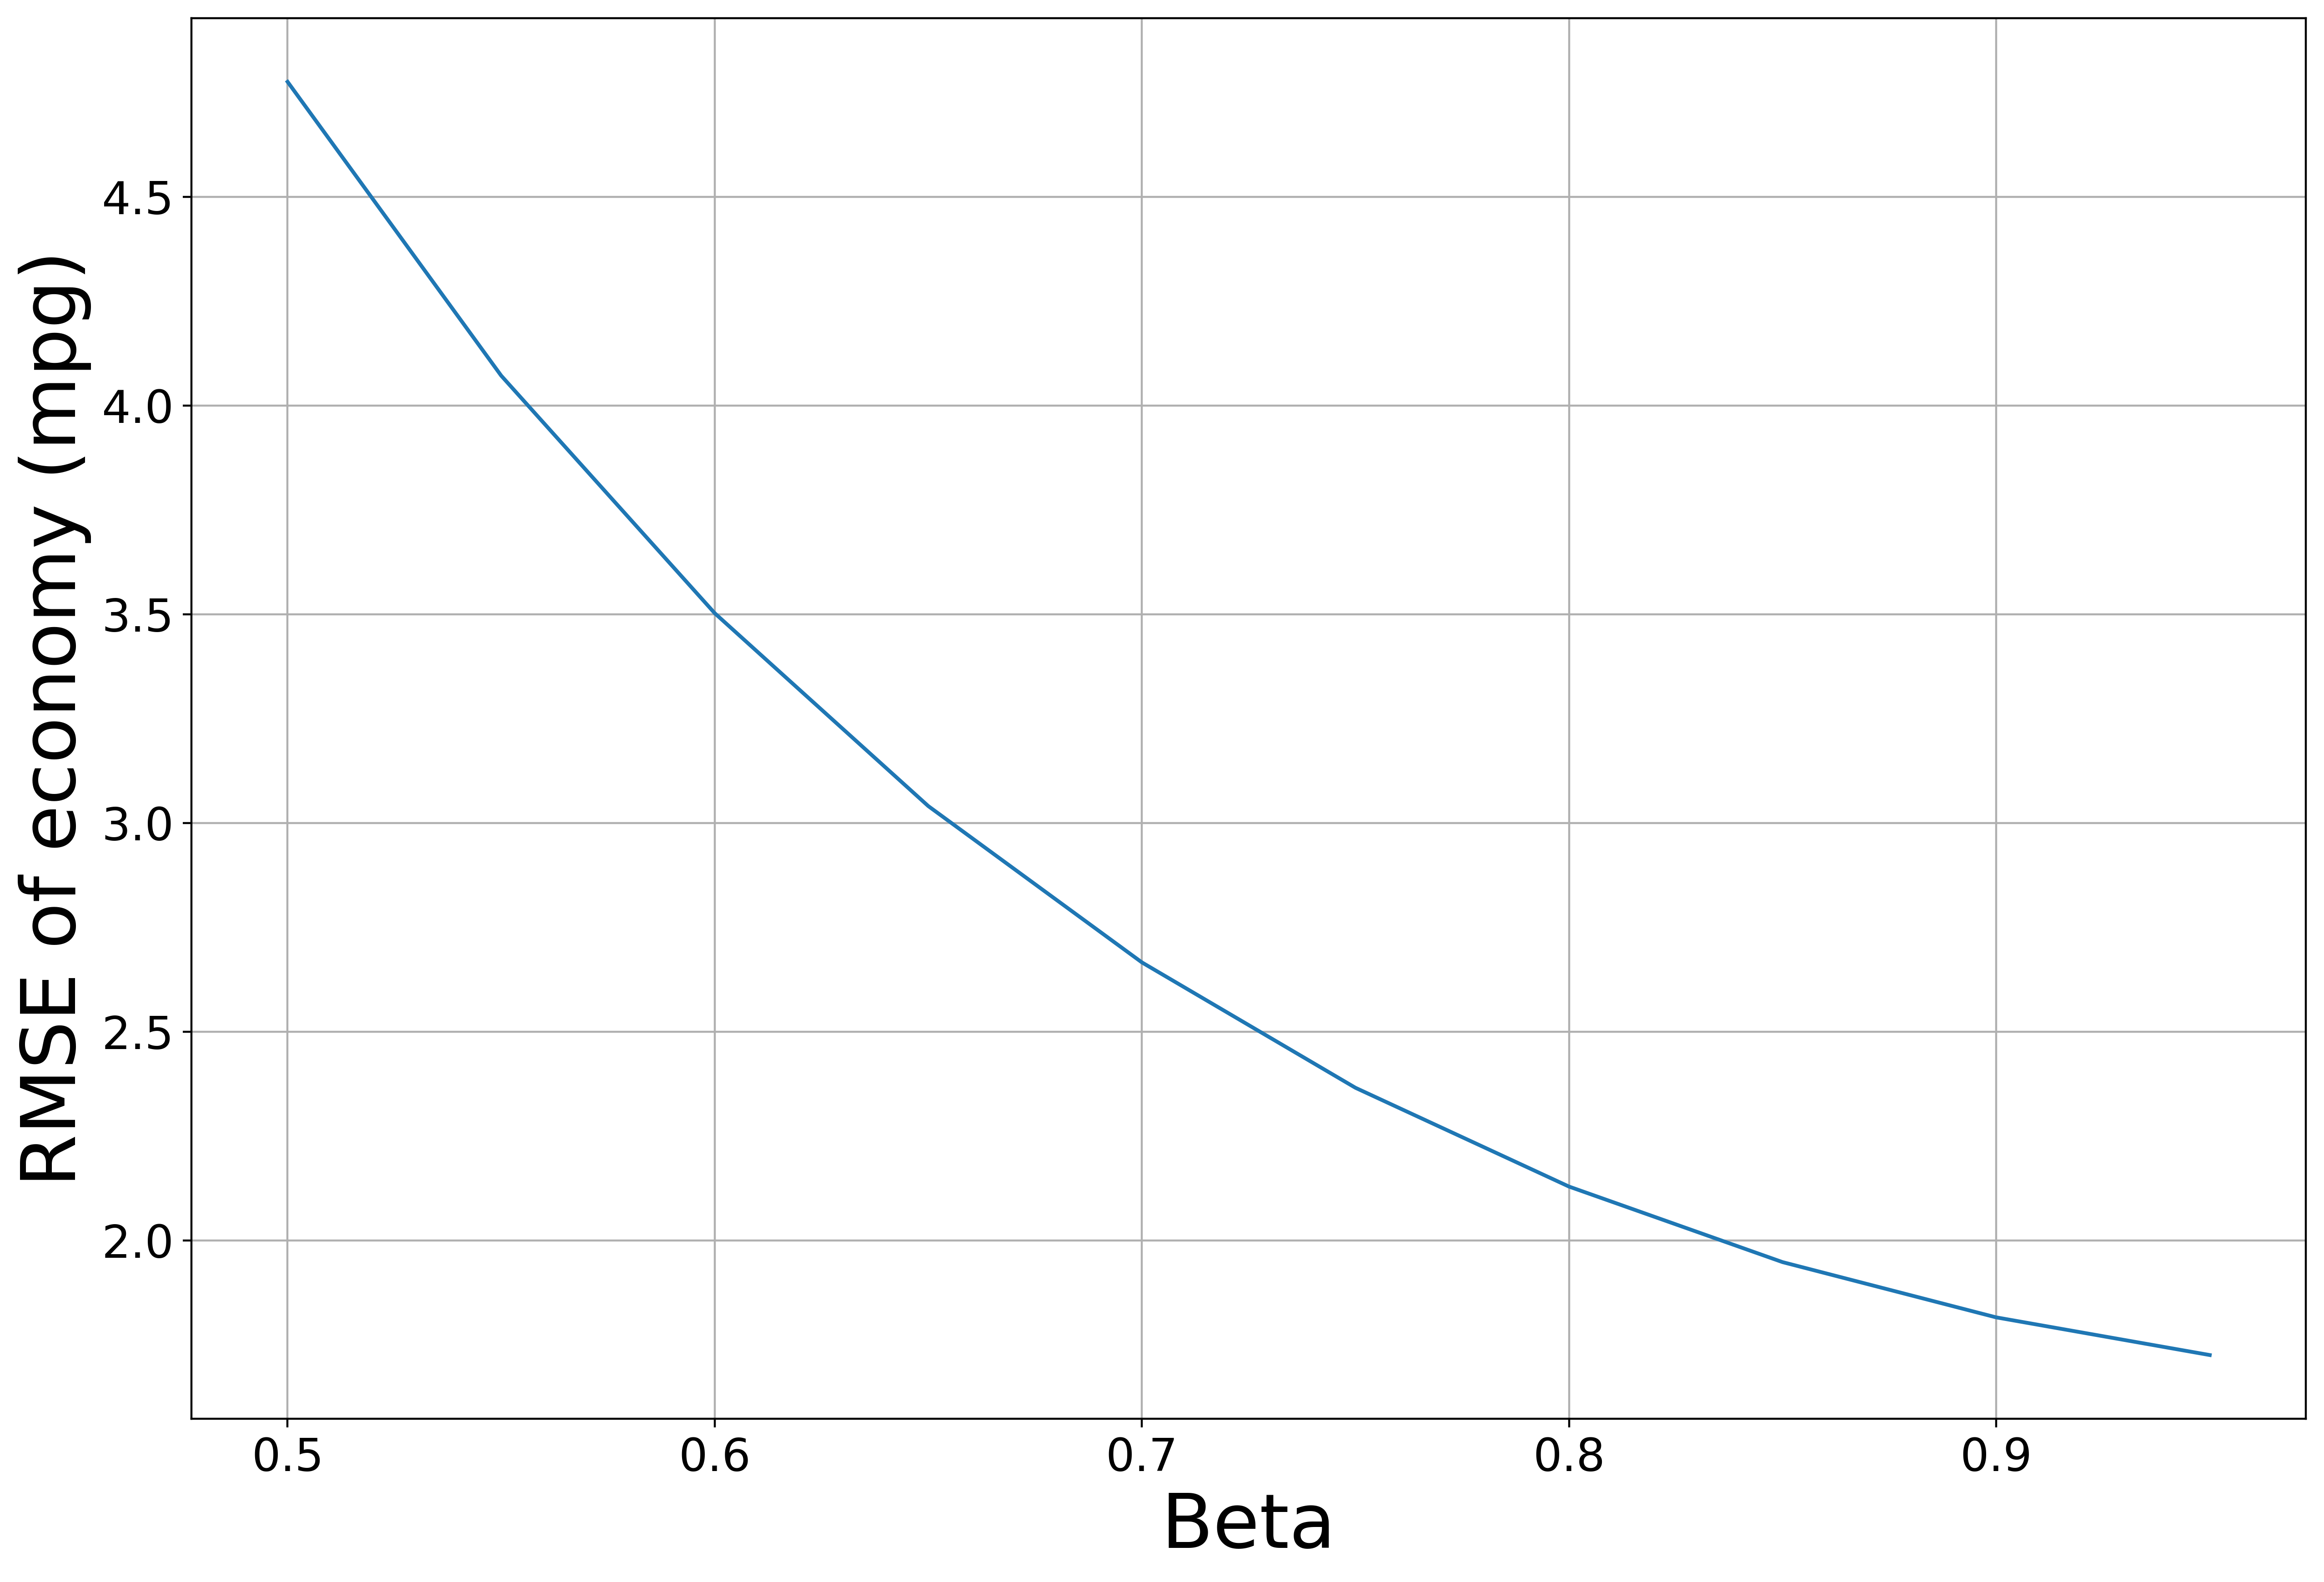

In [44]:
figure(figsize=(15, 10), dpi=400)
plt.plot(df_beta['parameter2_values'], df_beta['RMSE_Economy'])
plt.xlabel("Beta", fontsize=30)
plt.ylabel("RMSE of economy (mpg)", fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/calibration-HEB-economy-beta.png', dpi=400, bbox_inches='tight')
plt.show()

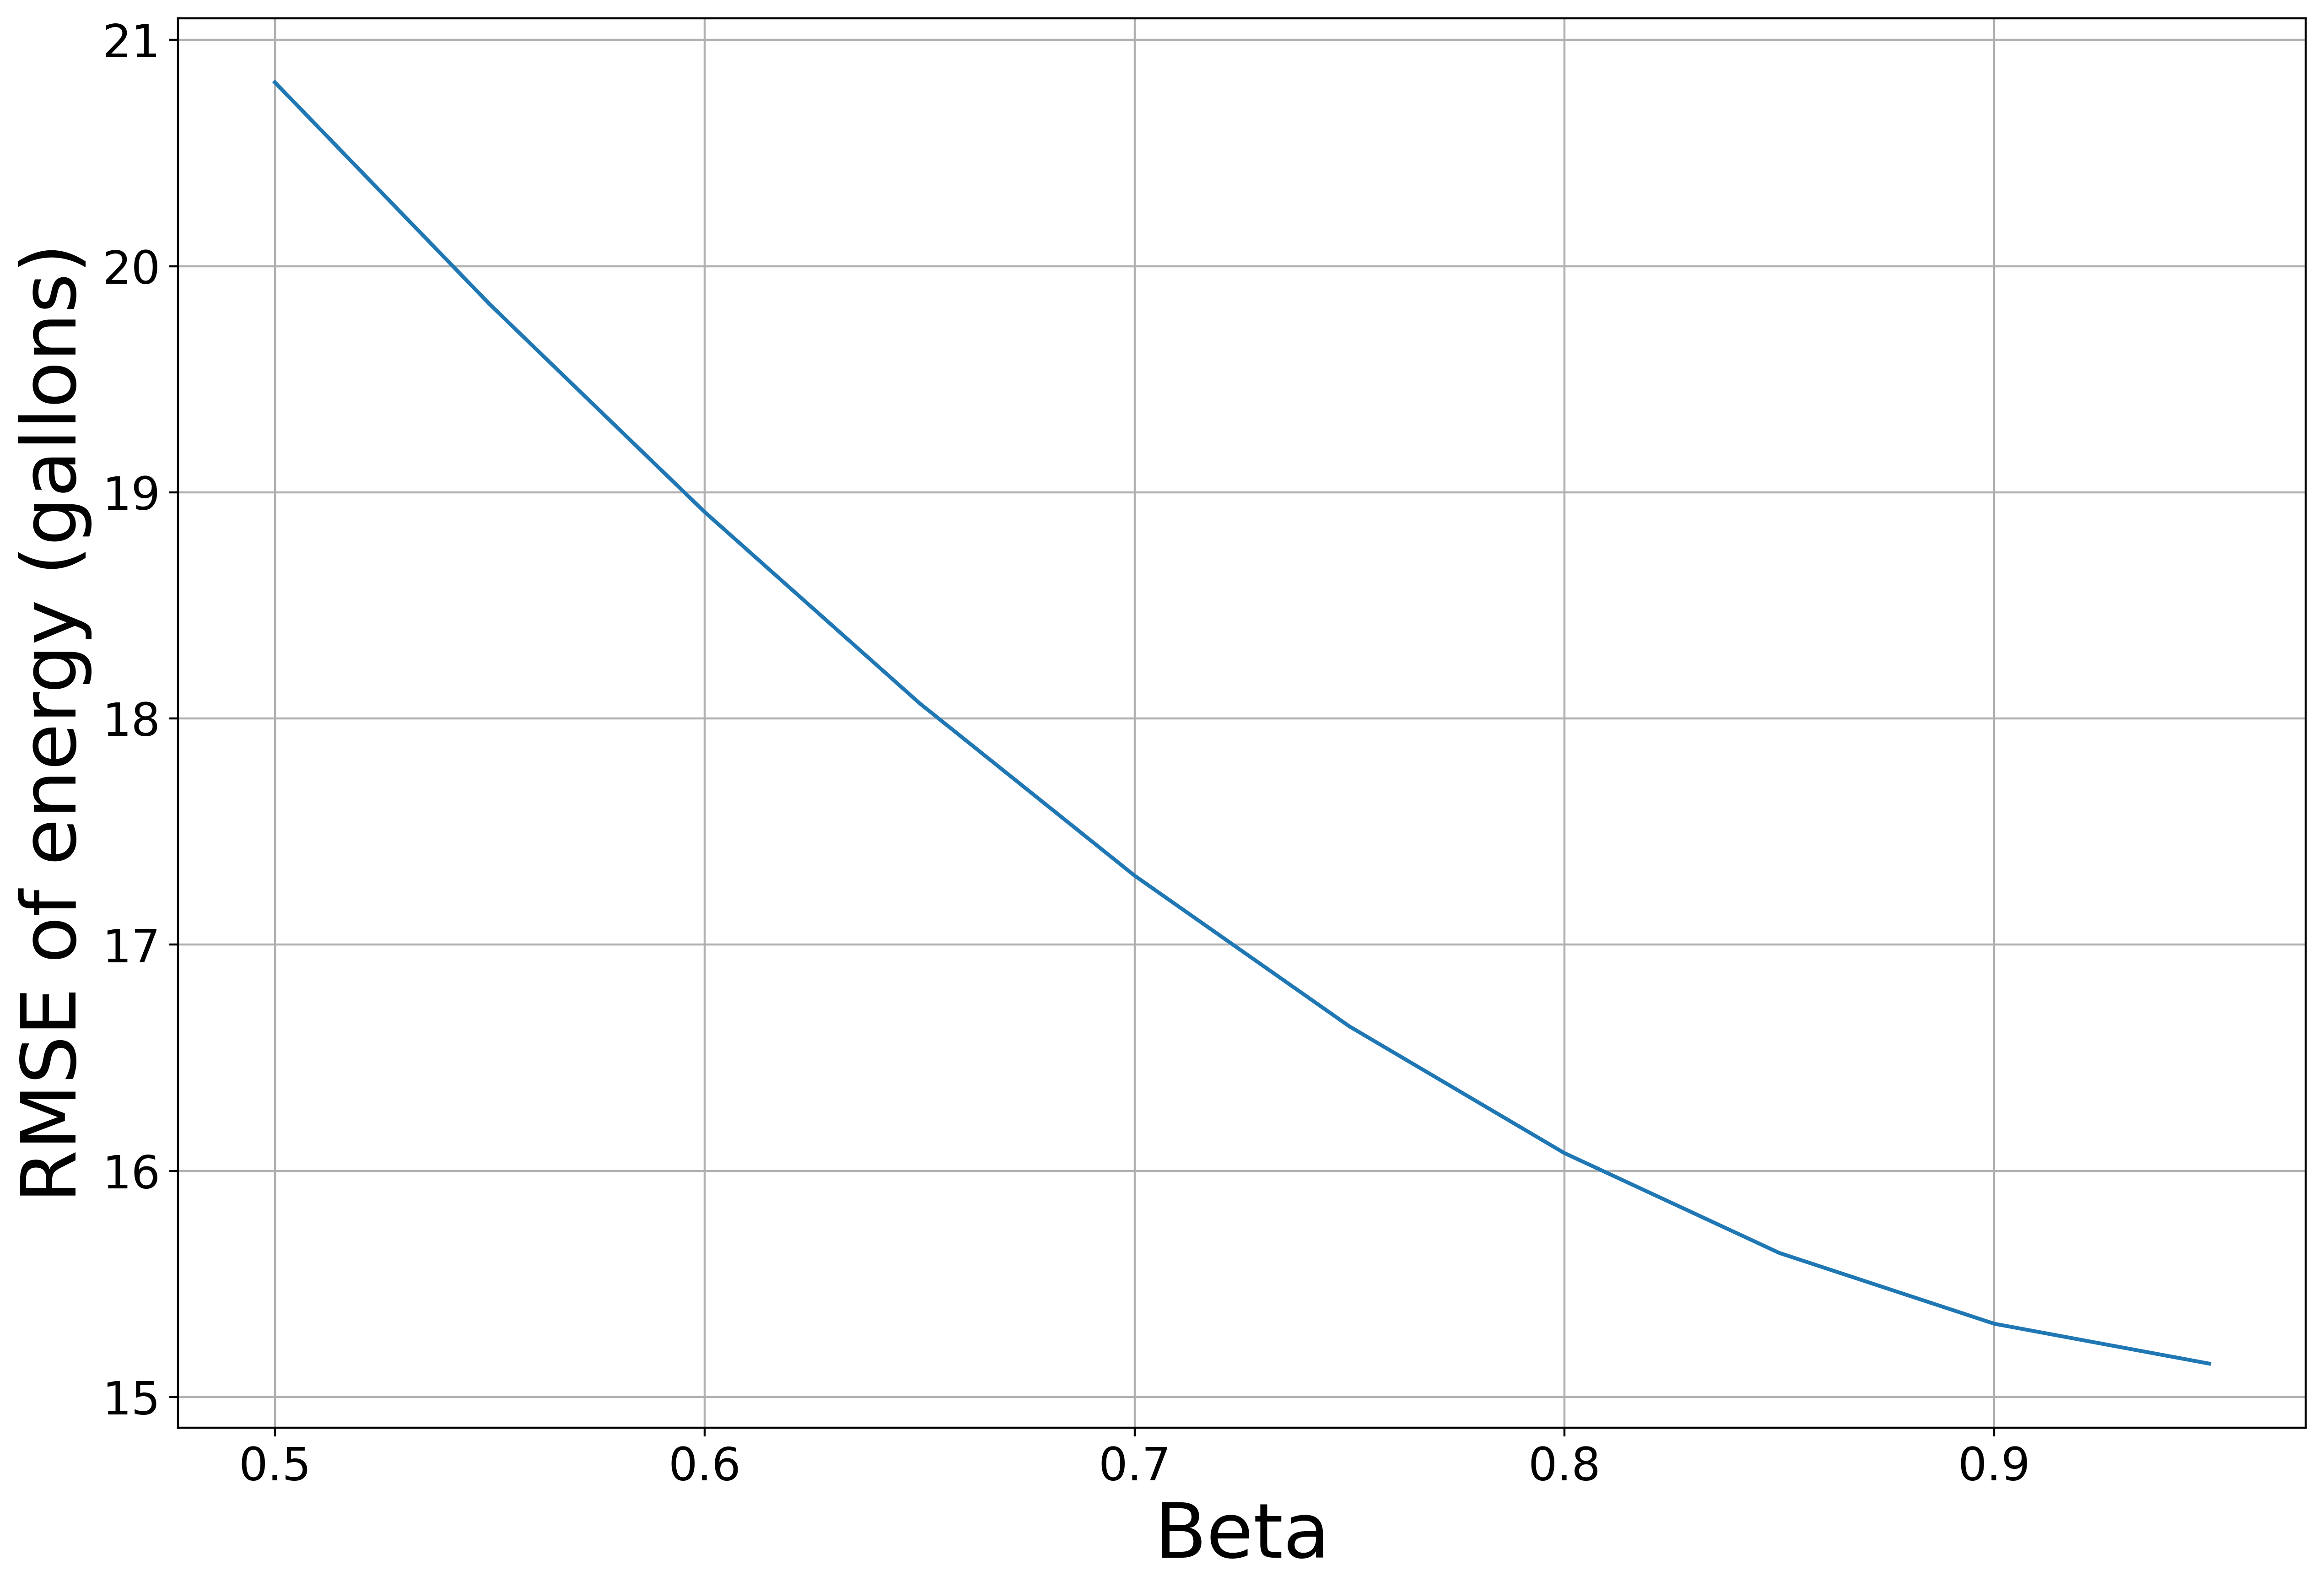

In [45]:
figure(figsize=(15, 10), dpi=400)
plt.plot(df_beta['parameter2_values'], df_beta['RMSE_Energy'])
plt.xlabel("Beta", fontsize=30)
plt.ylabel("RMSE of energy (gallons)", fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/calibration-HEB-energy-beta.png', dpi=400, bbox_inches='tight')
plt.show()

In [46]:
df_electric = pd.read_csv(r'../../results/calibration-results-electric.csv', delimiter=',', skiprows=0, low_memory=False)

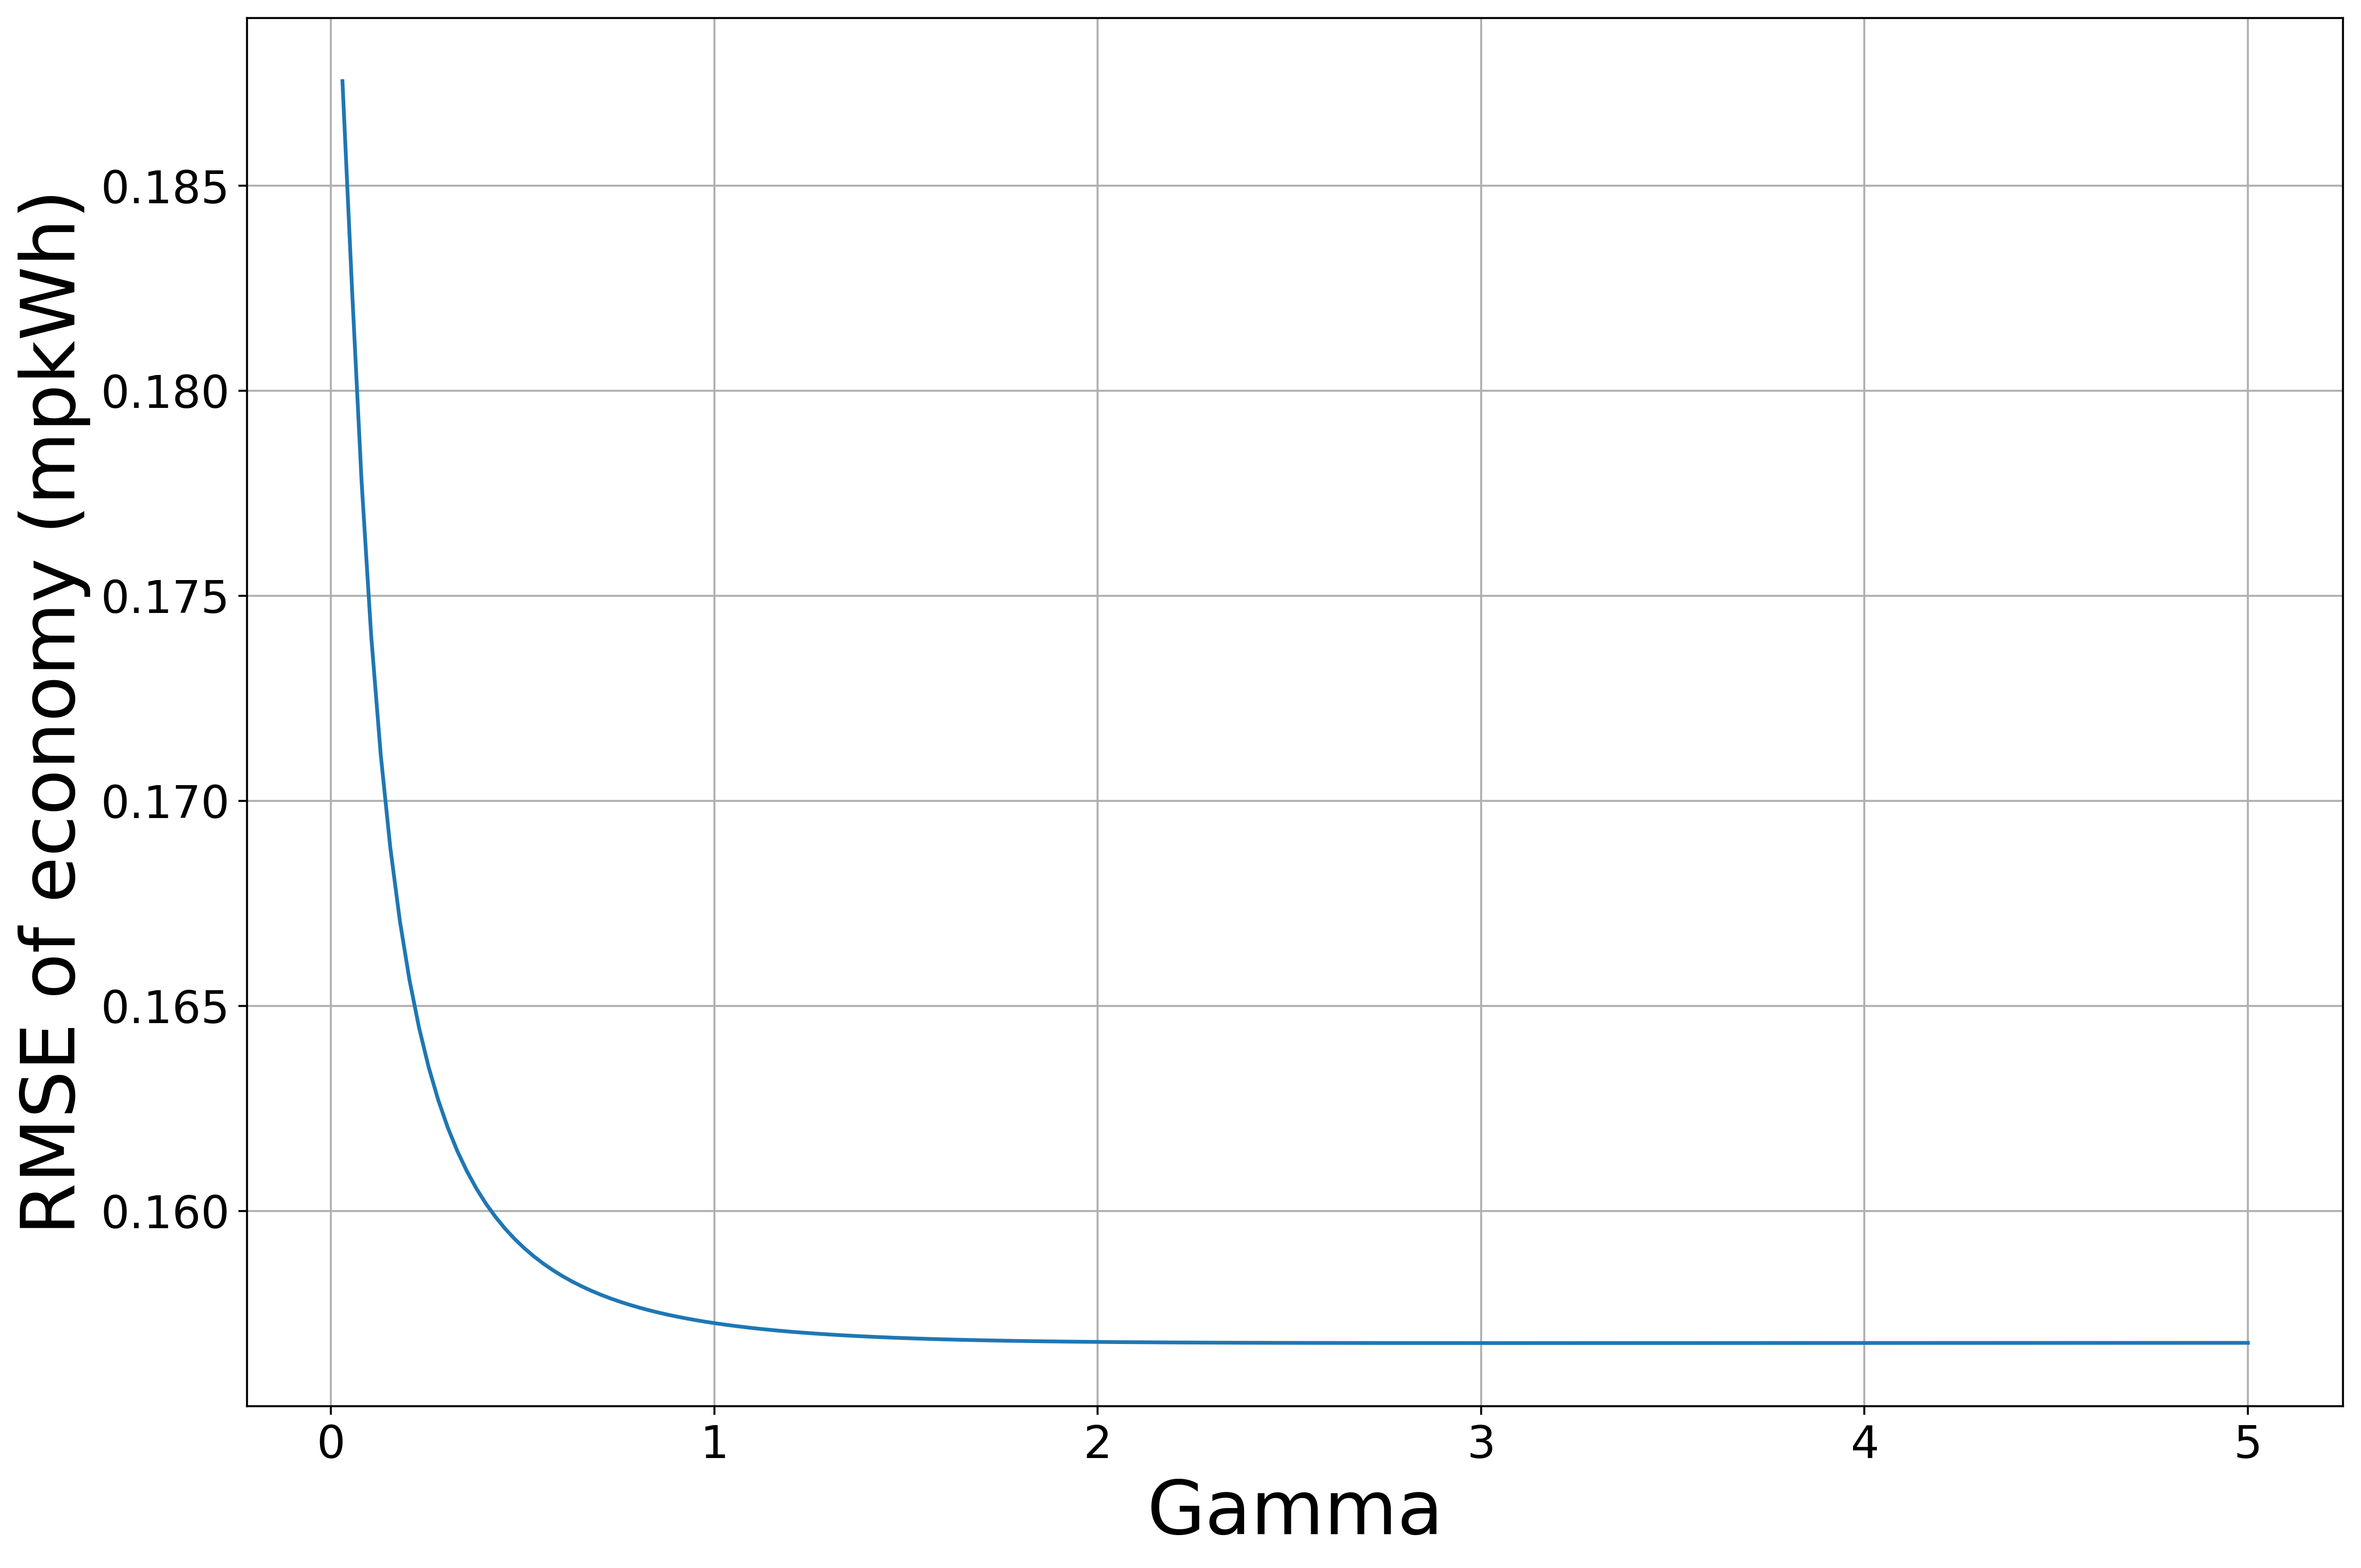

In [47]:
figure(figsize=(15, 10), dpi=400)
plot1=df_electric.groupby(by="parameter1_values")['RMSE_Economy'].min().reset_index()
plt.plot(plot1['parameter1_values'], plot1['RMSE_Economy'])
plt.xlabel("Gamma", fontsize=30)
plt.ylabel("RMSE of economy (mpkWh)", fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/calibration-BEB-economy-gamma.png', dpi=400, bbox_inches='tight')
plt.show()

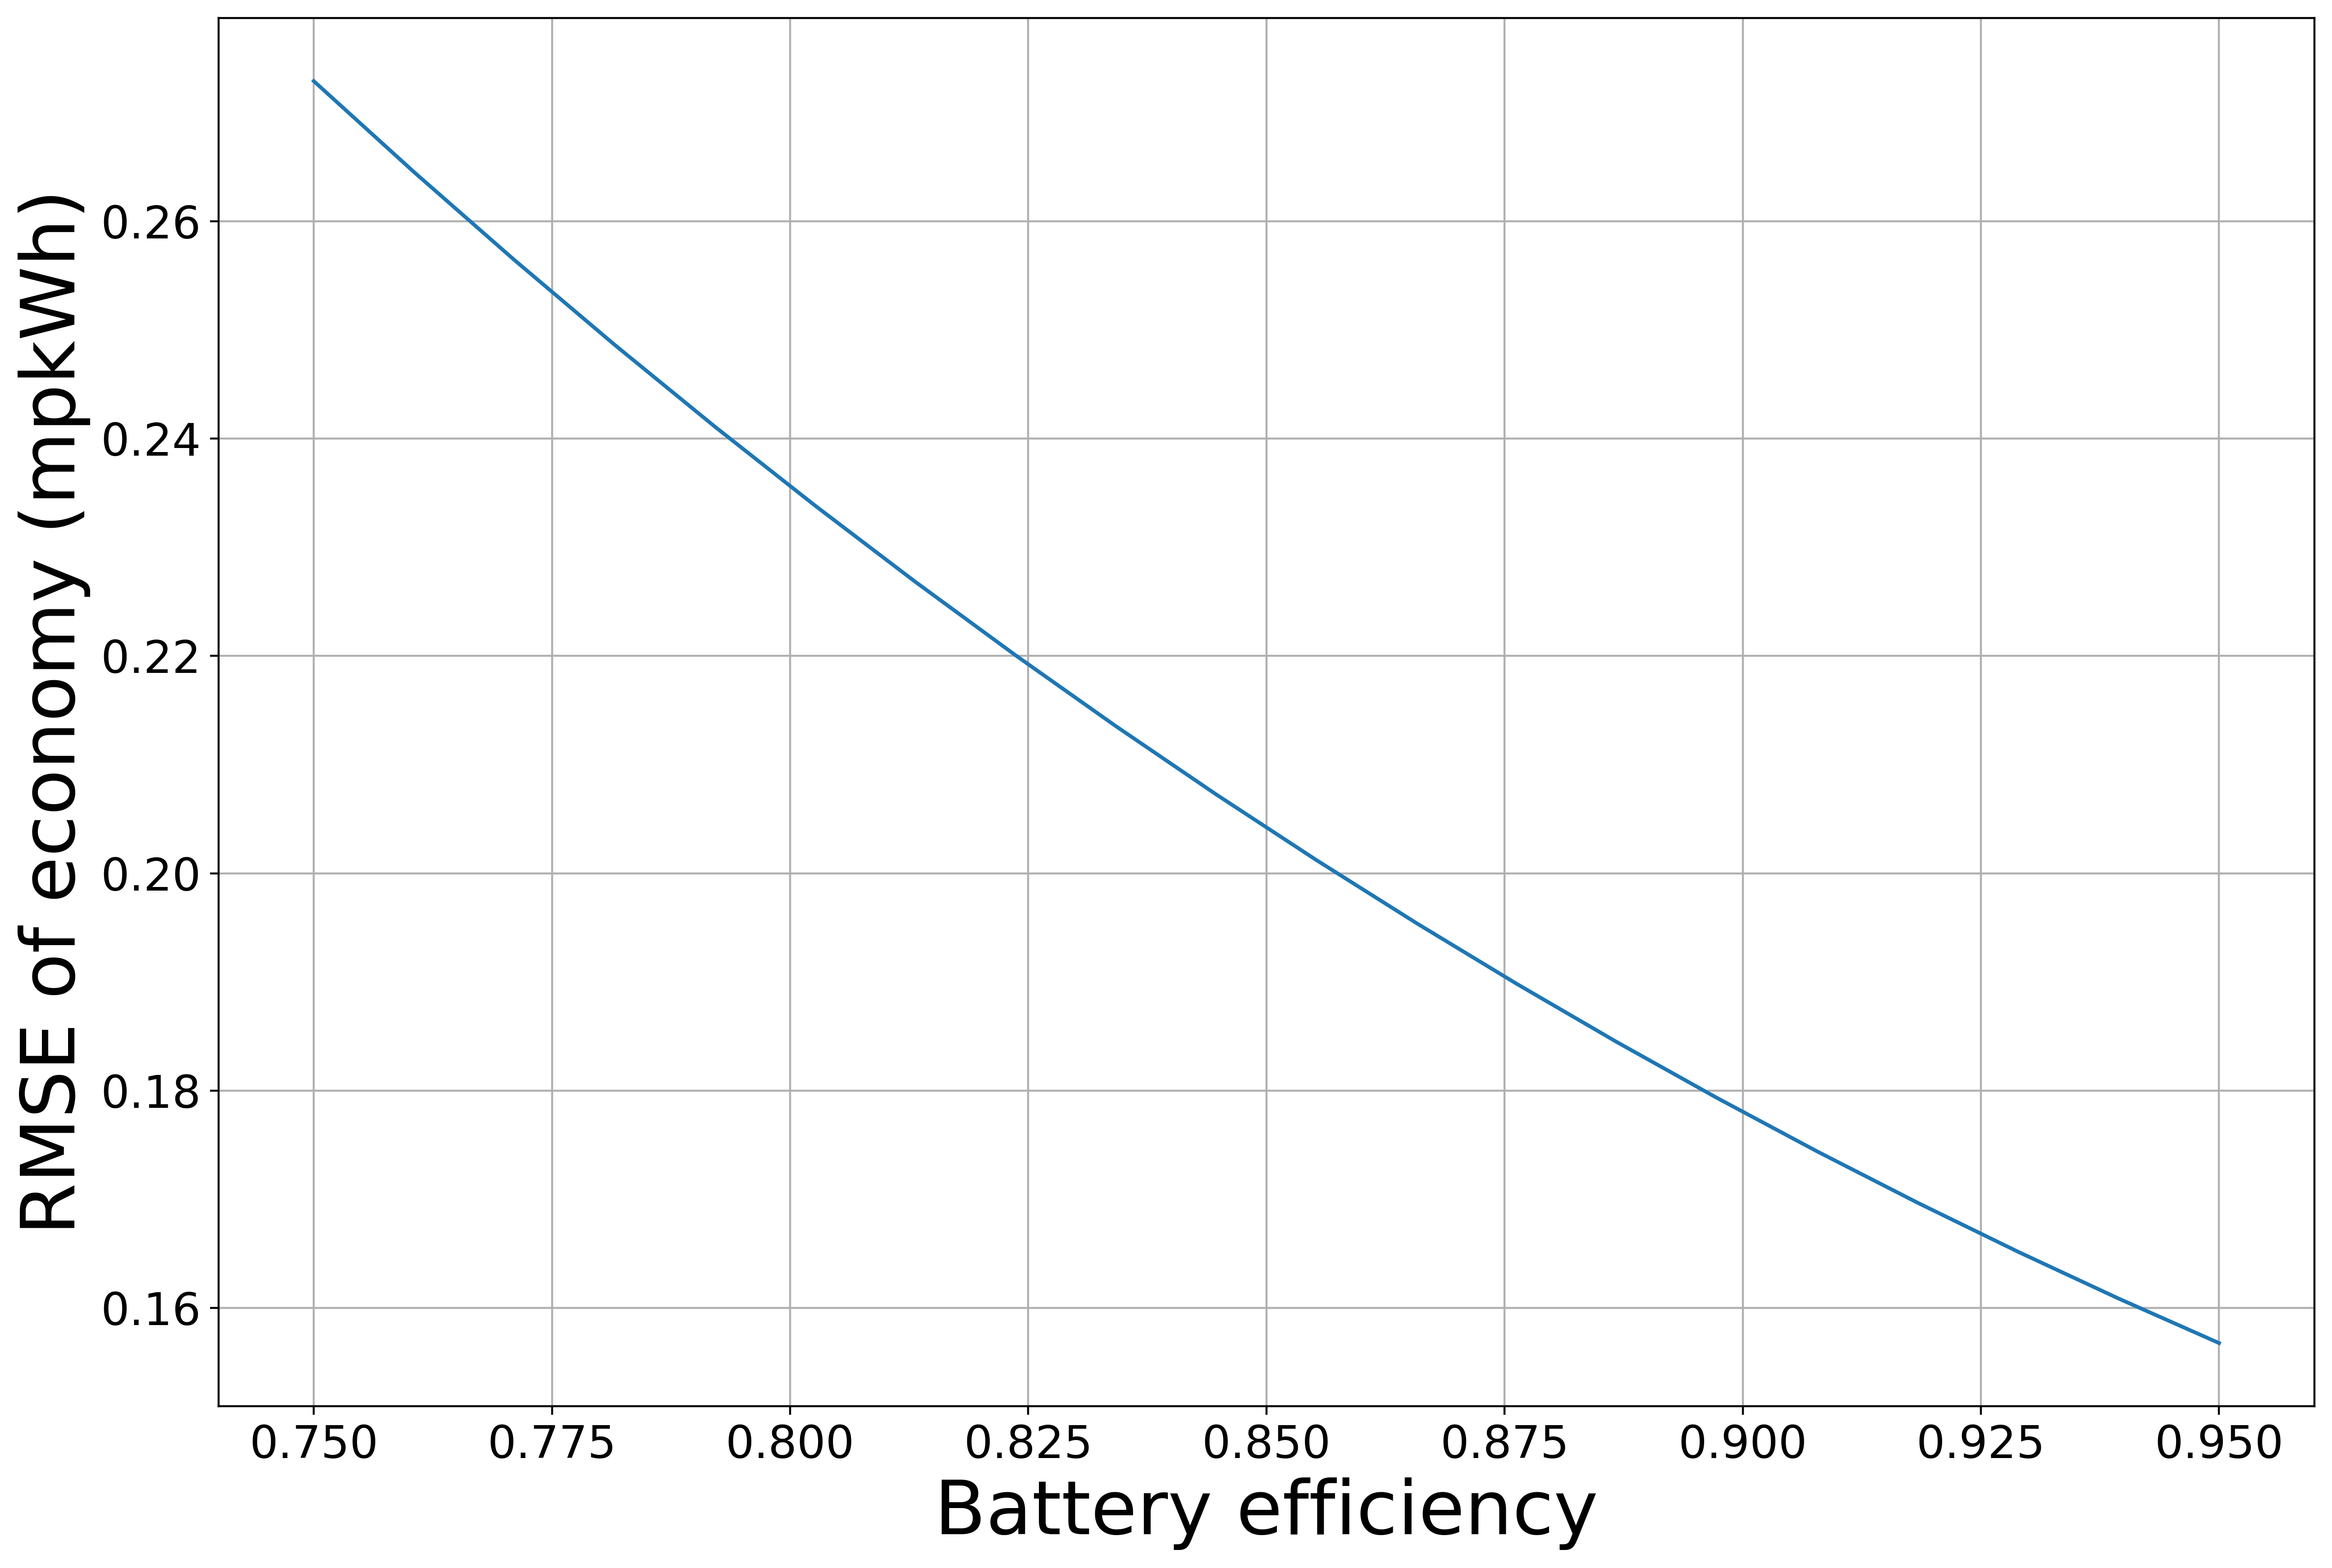

In [48]:
figure(figsize=(15, 10), dpi=400)
plot1=df_electric.groupby(by="parameter2_values")['RMSE_Economy'].min().reset_index()
plt.plot(plot1['parameter2_values'], plot1['RMSE_Economy'])
plt.xlabel("Battery efficiency", fontsize=30)
plt.ylabel("RMSE of economy (mpkWh)", fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/calibration-BEB-economy-eta.png', dpi=400, bbox_inches='tight')
plt.show()